In [1]:
cd /tf/astromer

/tf/astromer


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf 
import pandas as pd
import json
import os 


from core.classifier import predict_from_path
from core.data  import clf_records
from sklearn.metrics import confusion_matrix
from core.plots import plot_cm

%load_ext autoreload
%autoreload 2

In [8]:
dataset = 'alcock_2'
data_path = './data/records/{}/'.format(dataset.split('_')[0])

In [9]:
rnn = './clf_runs/{}/lstm'.format(dataset)
rnn_att = './clf_runs/{}/lstm_att'.format(dataset)
fc_att = './clf_runs/{}/fc_att'.format(dataset)

In [10]:
test_batches = clf_records(os.path.join(data_path, 'test'),
                           256,
                           take=-1,
                           max_obs=50)

[INFO] No shuffle No Oversampling


In [11]:
rnn_results = predict_from_path(rnn, test_batches, mode=2)

fc_att_results = predict_from_path(fc_att, test_batches, mode=1)

rnn_att_results = predict_from_path(rnn_att, test_batches, mode=0)

test: 0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['lcid', 'label', 'obserr', 'mask_out'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
test: 21it [00:03,  5.57it/s]
test: 0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['lcid', 'label', 'obserr', 'mask_out'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
test: 21it [00:01, 12.94it/s]
test: 0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/functional.py:585: UserWarning: Input dict contained keys ['lcid', 'label', 'obserr', 'mask_out'] which did not match any model input. They will be ignored by the model.
  [n for n in tensors.keys() if n not in ref_input_names])
test: 21it [00:03,  5.29i

In [12]:
print('MODEL -   F1   - PREC - RECA - ACC')
for rdic, name in zip([rnn_results, fc_att_results, rnn_att_results], ['LSTM', 'MLP + ATT', 'LSTM+ATT']):
    print('{} &   {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\hline'.format(name, rdic['f1'], rdic['precision'],
                                                     rdic['recall'], rdic['accuracy']))

MODEL -   F1   - PREC - RECA - ACC
LSTM &   0.14 & 0.19 & 0.17 & 0.22 \\hline
MLP + ATT &   0.17 & 0.22 & 0.23 & 0.28 \\hline
LSTM+ATT &   0.53 & 0.52 & 0.62 & 0.59 \\hline


In [13]:
cls_names = pd.read_csv(os.path.join(data_path, 'objects.csv'))['label'].values
cls_names

array(['Cep_0', 'Cep_1', 'EC', 'LPV', 'RRab', 'RRc'], dtype=object)

In [14]:
rnn_cm = confusion_matrix(rnn_results['y_true'], rnn_results['y_pred'], normalize='true')
rnn_att_cm = confusion_matrix(rnn_att_results['y_true'], rnn_att_results['y_pred'], normalize='true')

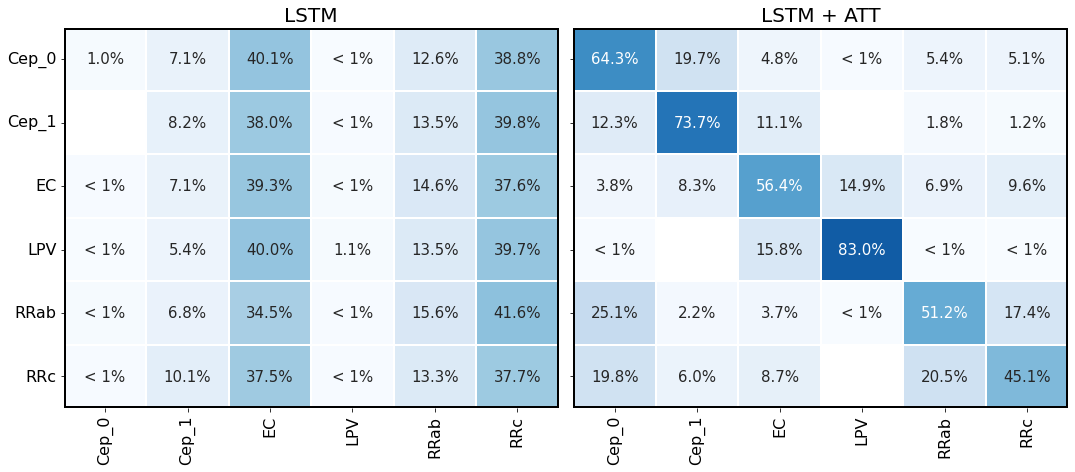

In [15]:
fig, axes = plt.subplots(1,2, figsize=(18,7), sharey=True, gridspec_kw={'hspace': 0., 'wspace': 0.03})

axes[0] = plot_cm(rnn_cm, axes[0], title='LSTM', class_names=cls_names)
axes[1] = plot_cm(rnn_att_cm, axes[1], title='LSTM + ATT', class_names=cls_names)